In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

# Load cleaned Titanic dataset
# df = pd.read_csv("/content/drive/MyDrive/Data Sets for Codveda Technologies/titanic_cleaned_normalized.csv")

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
# Cleaning the data set a bit

df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

# Using Median as some very old people (outliers) throw the mean off
df['Age'].fillna(df['Age'].median(), inplace=True)

# Using Median as some very old people (outliers) throw the mean off
df['Age'].fillna(df['Age'].median(), inplace=True)

# Categorical data and only 2 missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

/tmp/ipython-input-48-2070240929.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-48-2070240929.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [49]:
# Removing Ouliers

# Outlier detection for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3-Q1
print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}\n')

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Outlier detection for Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}\n')

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

Q1: 7.9104, Q3: 31.0, IQR: 23.0896

Lower Bound: -26.724, Upper Bound: 65.6344
Q1: 22.0, Q3: 34.0, IQR: 12.0

Lower Bound: 4.0, Upper Bound: 52.0


In [50]:
# Quick overview
df.describe().T  # .T for better formatting

# Median of key columns
print("Median Age:", df['Age'].median())
print("Median Fare:", df['Fare'].median())

# Variance of numeric columns
print(df[['Age', 'Fare', 'SibSp', 'Parch']].var())


Median Age: 28.0
Median Fare: 11.2417
Age       90.367845
Fare     179.947604
SibSp      0.707044
Parch      0.611584
dtype: float64


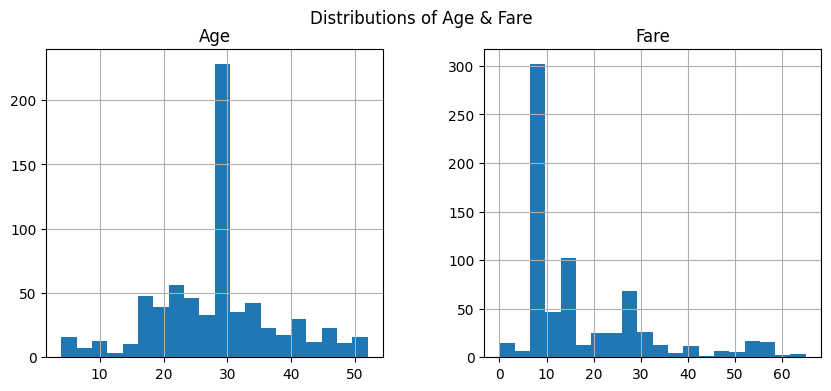

<Figure size 640x480 with 0 Axes>

In [57]:
# Histogram for numeric values
df[['Age', 'Fare']].hist(bins=20, figsize=(10,4))
plt.suptitle("Distributions of Age & Fare")
plt.show()
plt.savefig('plots/age_fare_histogram.png')

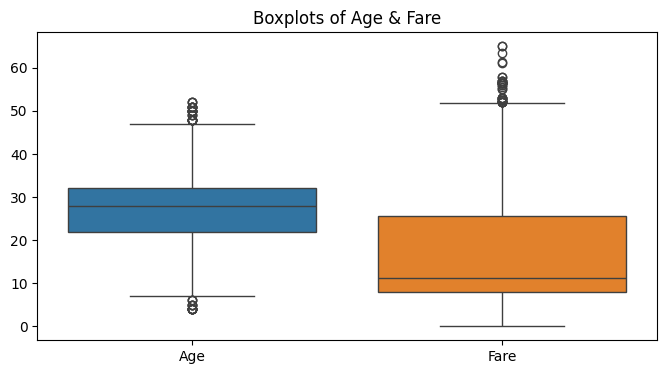

<Figure size 640x480 with 0 Axes>

In [56]:
plt.figure(figsize=(8,4))
sbn.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots of Age & Fare")
plt.show()
plt.savefig('plots/age_fare_boxplot.png')

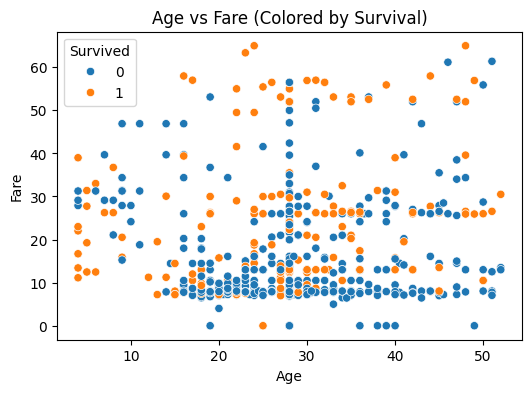

<Figure size 640x480 with 0 Axes>

In [58]:
plt.figure(figsize=(6,4))
sbn.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()
plt.savefig('plots/age_fare_scatterplot.png')

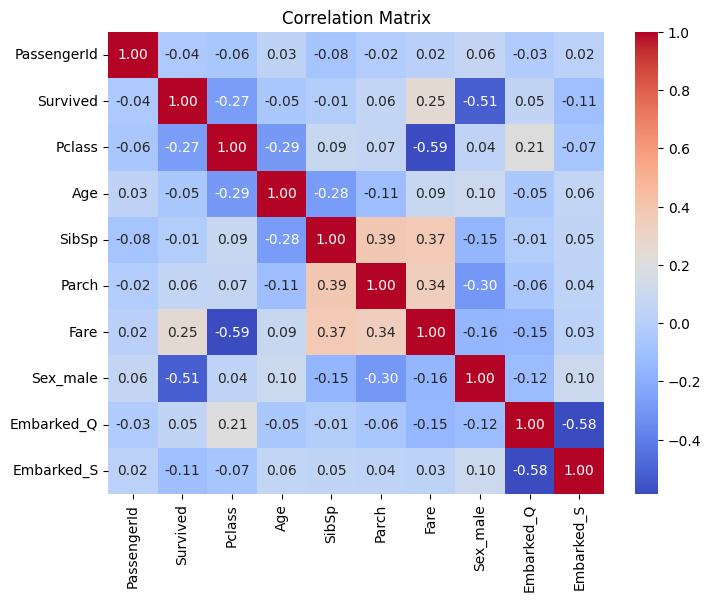

<Figure size 640x480 with 0 Axes>

In [59]:
# Identify correlations between numerical features using a correlation matrix.
plt.figure(figsize=(8,6))
sbn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
plt.savefig('plots/heatmap-correlation-matrix.png')

# Task 3: Exploratory Data Analysis (EDA) – Titanic Dataset

As part of my Data Science Internship at **Codveda Technologies**, I explored the Titanic dataset to uncover patterns and relationships using summary statistics and visualizations.

## Key Insights

1. **Passenger Demographics**  
   - Most passengers were between **20–40 years old**.  
   - There was a slightly higher number of male passengers than female passengers.  

2. **Fare & Class**  
   - Ticket fares were **highly skewed**, with most passengers paying relatively low amounts, while a few paid very high fares.  
   - There is a strong negative correlation between **Pclass** and **Fare** (higher class → higher fare).

3. **Survival Patterns**  
   - Passengers who paid **higher fares** had a better chance of survival.  
   - Survival rates differed by **embarkation port** and **gender**.  

4. **Feature Correlations**  
   - Strong relationships were observed between **Pclass & Fare** and **SibSp & Parch**.  
   - Other numerical features showed weak correlations with survival.  

## Visualizations
- **Histograms**: Showed the distribution of Age & Fare.  
- **Boxplots**: Helped identify spread and outliers in Age & Fare.  
- **Scatter Plot**: Explored the relationship between Age, Fare, and Survival.  
- **Correlation Heatmap**: Visualized the strength of relationships between numerical features.  

---

> *This EDA provided key insights into passenger demographics, ticket pricing, and survival trends, helping frame hypotheses for future analysis and modeling.*
